# 휘발유 가격 정보 시각화

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

get_ipython().run_line_magic("matplotlib", "inline")
# %matplotlib inline 

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin": # Mac
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name() 
    rc("font", family=font_name)
else:
    print("Unkown system. sorry~~")

In [2]:
import pandas as pd

oil_stations = pd.read_csv("./result_data/02_oil_stations.csv", index_col=0)
oil_stations

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1559.0,Y,HD현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1584.0,N,HD현대오일뱅크,강동구
2,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1636.0,Y,GS칼텍스,강동구
3,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1636.0,N,GS칼텍스,강동구
4,방아다리주유소,서울 강동구 동남로 811 (명일동),1665.0,Y,SK에너지,강동구
...,...,...,...,...,...,...
433,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2158.0,N,HD현대오일뱅크,강남구
434,대청주유소,서울 강남구 개포로 654 (일원동),2195.0,N,SK에너지,강남구
435,SK논현주유소,서울 강남구 논현로 747 (논현동),2395.0,N,SK에너지,강남구
436,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2490.0,N,HD현대오일뱅크,강남구


### 🔰 boxplot (feat. pandas)

- 셀프인 주유소와 아닌 주유소 간의 휘발유 가격 비교 그래프

<Axes: title={'center': '가격'}, xlabel='셀프'>

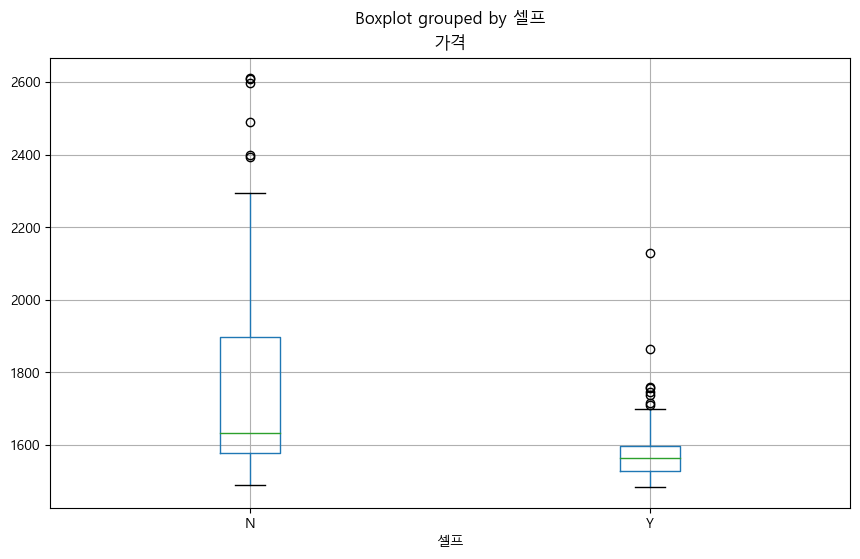

In [3]:
oil_stations.boxplot(column="가격", by="셀프", figsize=(10, 6))

### 🔰 boxplot (feat. seaborn)

![boxplot-1](https://github.com/ElaYJ/Study_EDA/assets/153154981/d1f49558-a16e-4b03-8f5c-6649978d0f6a)
![boxplot-2](https://github.com/ElaYJ/Study_EDA/assets/153154981/e2f96100-8636-4d30-8920-d4509fa160b5)
![boxplot-3](https://github.com/ElaYJ/Study_EDA/assets/153154981/21630483-2621-4964-9611-01bc863a20f1)

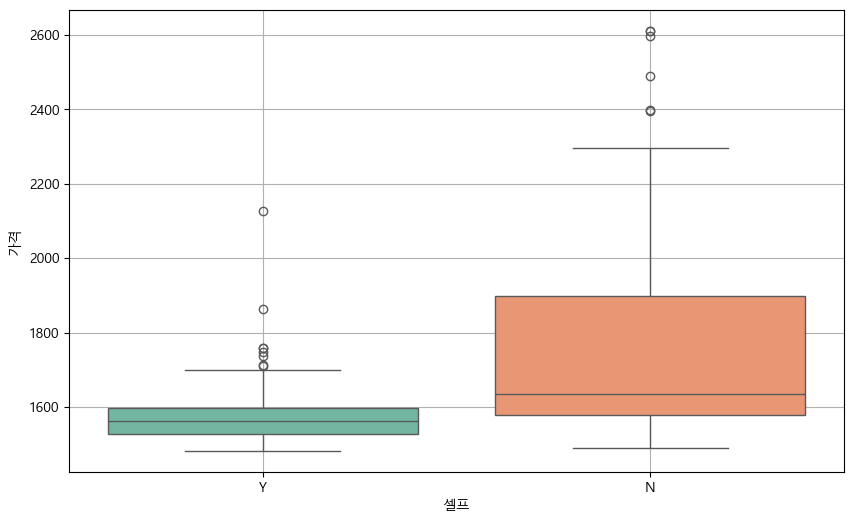

In [4]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

plt.figure(figsize=(10, 6))
sns.boxplot(x="셀프", y="가격", data=oil_stations, palette="Set2")
plt.grid(True)
plt.show()

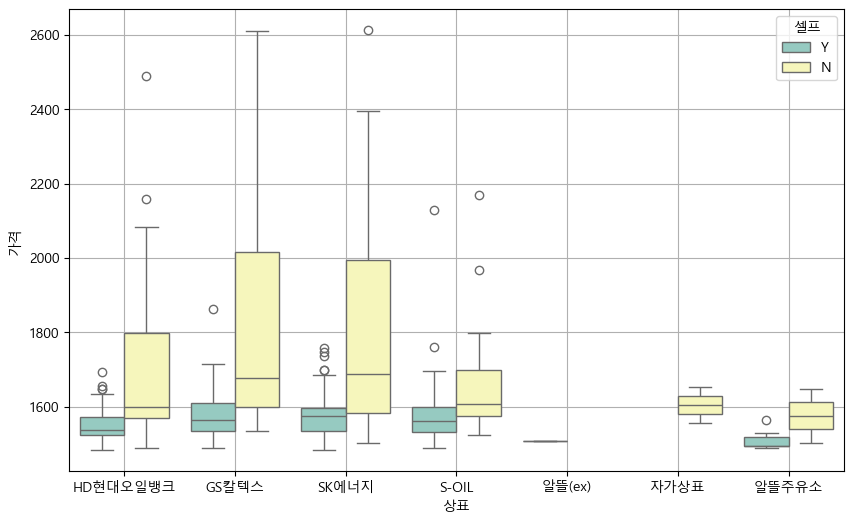

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="상표", y="가격", hue="셀프", data=oil_stations, palette="Set3")
plt.grid(True)
plt.show()

### 🔰 지도 시각화

In [6]:
import folium
import json

- 가장 비싼 주유소 10개

In [8]:
oil_stations.sort_values(by="가격", ascending=False).head(10)

,상호,주소,가격,셀프,상표,구
273,서남주유소,서울 중구 통일로 30,2611.0,N,SK에너지,중구
239,서계주유소,서울 용산구 청파로 367 (청파동),2609.0,N,GS칼텍스,용산구
437,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598.0,N,GS칼텍스,강남구
436,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2490.0,N,HD현대오일뱅크,강남구
272,필동주유소,서울 중구 퇴계로 196 (필동2가),2399.0,N,GS칼텍스,중구
435,SK논현주유소,서울 강남구 논현로 747 (논현동),2395.0,N,SK에너지,강남구
215,SJ오일(주) 여의도주유소,서울 영등포구 은행로 64,2295.0,N,GS칼텍스,영등포구
263,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2290.0,N,GS칼텍스,종로구
262,경복궁주유소,서울 종로구 율곡로 6 (중학동),2280.0,N,GS칼텍스,종로구
261,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,2267.0,N,SK에너지,종로구


- 가장 값싼 주유소 10개

In [7]:
oil_stations.sort_values(by="가격", ascending=True).head(10)

,상호,주소,가격,셀프,상표,구
287,강서오곡셀프주유소,서울 강서구 벌말로 254 (오곡동),1483.0,Y,SK에너지,강서구
240,타이거주유소,서울 은평구 수색로 188 (증산동),1484.0,Y,SK에너지,은평구
241,(주)명연에너지 수색훼미리주유소,서울 은평구 수색로 236 (수색동),1485.0,Y,HD현대오일뱅크,은평구
349,(주)한미석유구로그린주유소,서울 구로구 구로중앙로 76 (구로동),1489.0,Y,GS칼텍스,구로구
198,(주)MS에너지,서울 영등포구 대림로 230,1489.0,N,HD현대오일뱅크,영등포구
197,도림주유소,서울 영등포구 도림로 343 (도림동),1489.0,Y,알뜰주유소,영등포구
348,㈜자연에너지 고척주유소,서울 구로구 고척로 199 (고척동),1489.0,Y,HD현대오일뱅크,구로구
196,한경석유(주)경덕주유소,서울 영등포구 여의대방로23길 2 (신길동),1489.0,Y,SK에너지,영등포구
194,(주)강서오일,서울 영등포구 도신로 151,1489.0,Y,HD현대오일뱅크,영등포구
193,남서울고속주유소,서울 영등포구 가마산로 367 (대림동),1489.0,Y,SK에너지,영등포구


- 구별로 가격 재편성

	- 구별로 전체 주유소 휘발유 가격 평균으로 DataFrame 새로 생성

In [9]:
# aggfunc의 Default 값인 평균(mean)을 그대로 사용
gu_price_data = pd.pivot_table(data=oil_stations, index="구", values="가격")
gu_price_data.head()

,가격
구,
강남구,1851.580645
강동구,1697.357143
강북구,1532.083333
강서구,1586.303030
관악구,1613.142857


- 구별 평균 가격을 지도로 표시

In [20]:
geo_path = "../data/02. skorea_municipalities_geo_simple.json"
geo_str	= json.load(open(geo_path, encoding="utf-8"))

oil_price_map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles="CartoDB Voyager")

folium.Choropleth(
	geo_data=geo_str,
	data=gu_price_data,
	columns=[gu_price_data.index, "가격"],
	key_on="feature.id", # 데이터(data=)랑 지도(geo_data=)를 합쳐주는 기준은
    fill_color="PuRd",
    legend_name="휘발유 가격"
).add_to(oil_price_map)

oil_price_map

In [15]:
geo_path = "../data/02. skorea_municipalities_geo_simple.json"
geo_str	= json.load(open(geo_path, encoding="utf-8"))

oil_price_map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles="CartoDB Positron")

folium.Choropleth(
	geo_data=geo_str,
	data=gu_price_data,
	columns=[gu_price_data.index, "가격"],
	key_on="feature.id", # 데이터(data=)랑 지도(geo_data=)를 합쳐주는 기준은
    fill_color="PuRd",
    legend_name="휘발유 가격"
).add_to(oil_price_map)

oil_price_map

In [16]:
geo_path = "../data/02. skorea_municipalities_geo_simple.json"
geo_str	= json.load(open(geo_path, encoding="utf-8"))

#StamenTonerLite
tiles='https://tiles.stadiamaps.com/tiles/stamen_toner_lite/{z}/{x}/{y}{r}.png'
attribution='&copy; <a href="https://www.stadiamaps.com/" target="_blank">Stadia Maps</a> &copy; <a href="https://www.stamen.com/" target="_blank">Stamen Design</a> &copy; <a href="https://openmaptiles.org/" target="_blank">OpenMapTiles</a> &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors'
oil_price_map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles=tiles, attr=attribution)

folium.Choropleth(
	geo_data=geo_str,
	data=gu_price_data,
	columns=[gu_price_data.index, "가격"],
	key_on="feature.id", # 데이터(data=)랑 지도(geo_data=)를 합쳐주는 기준은
    fill_color="PuRd",
    legend_name="휘발유 가격"
).add_to(oil_price_map)

oil_price_map